## 회귀 개념
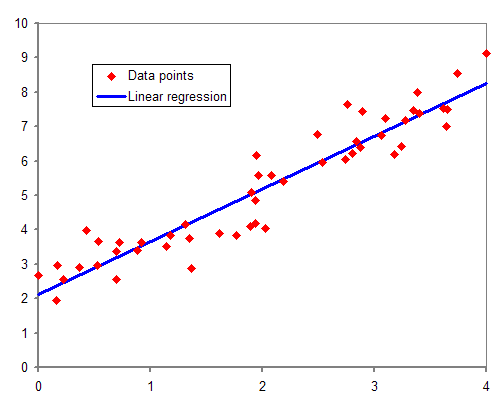
- 회귀 분석이란 데이터를 가장 잘 설명하는 선을 찾아 입력값에 따른 미래 결과값을 예측하는 알고리즘이다. 
- Loss Function(실제 값과 모델이 예측하는 값의 오차)를 최소화하는 Gradient Descent(최적의 $β0, β1$를 찾는 알고리즘)을 통해
데이터를 가장 잘 설명할 수 있는 선을 찾는 방법
- Y = beta_0 + beta_1 * X


## Simple Linear Regression
- 입력값이 결과값에 얼마나 영향을 미치는지 알 수 있다.
- 두 변수 간의 관계를 직관적으로 해석하고 알아볼 수 있다.
- 입력값이 1개인 경우에만 적용가능

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y

def regression_model(train_X, train_y):
    
    simplelinear = LinearRegression()
    simplelinear.fit(train_X, train_y)
    
    return simplelinear

def plotting_graph(train_X, test_X, train_y, test_y, predicted):
    fig, ax = plt.subplots(1,2, figsize=(16, 7))
    
    ax[0].scatter(train_X,train_y)
    ax[1].scatter(test_X,test_y)
    ax[1].plot(test_X, predicted, color='b')
    
    ax[0].set_xlabel('train_X')
    ax[0].set_ylabel('train_y')
    ax[1].set_xlabel('test_X')
    ax[1].set_ylabel('test_y')
    
    fig.savefig("result.png")

> beta_0 :  [2.89804615]
> beta_1 :  [[2.90298892]]
> 모델 평가 점수 : 0.8948735905242707


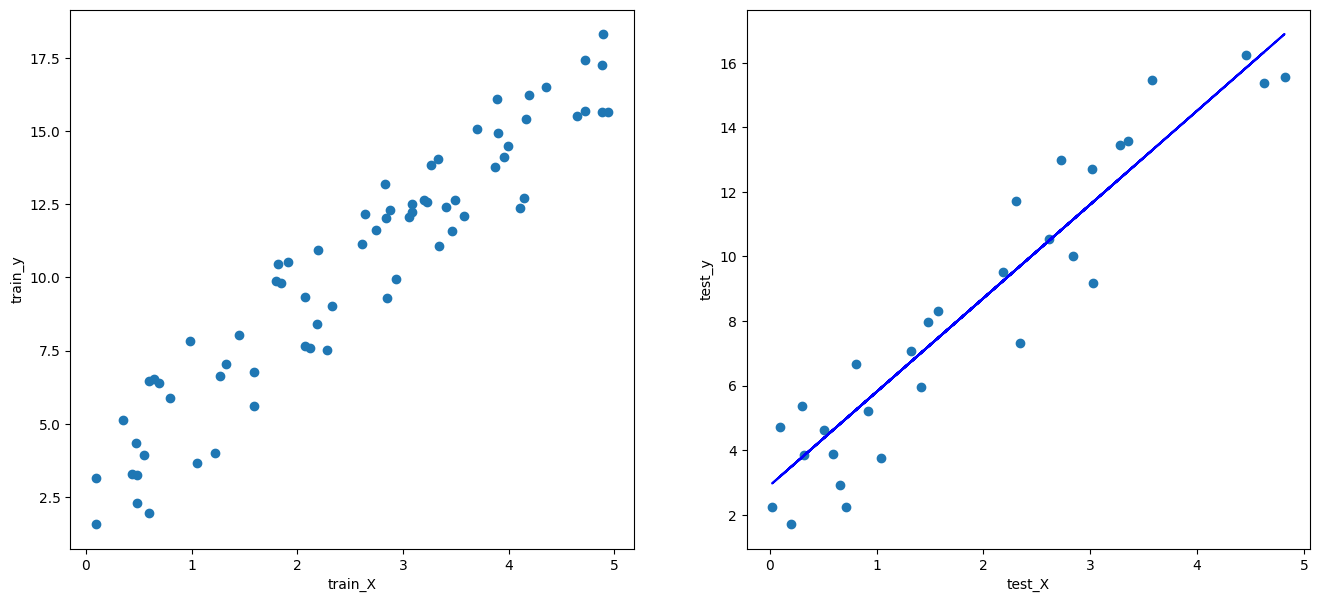

In [6]:
# 데이터 로드
train_X, test_X, train_y, test_y = load_data()
# 선형회귀 모델 학습
simplelinear = regression_model(train_X, train_y)
# 예측
predicted = simplelinear.predict(test_X)
# 평가
model_score = simplelinear.score(test_X, test_y)
# Y = beta_0 + beta_1 * X
beta_0 = simplelinear.intercept_
beta_1 = simplelinear.coef_

print("> beta_0 : ",beta_0)
print("> beta_1 : ",beta_1)
print("> 모델 평가 점수 :", model_score)

# 시각화
plotting_graph(train_X, test_X, train_y, test_y, predicted)

## Multiple Regression(다중 회귀)
- 일차 함수 식으로 표현할 수 없는 복잡한 데이터 분포에도 적용가능
- 입력값이 결과값에 얼마나 영향을 미치는지 알 수 있음
- 여러개의 입력값 사이에 서로 상관관계가 높다면 성능이 잘나오지 않음
- 극단적으로 높은 차수의 모델을 구현할 경우 과도하게 학습 데이터에 맞춰지는 과적합 현상 발생
- 데이터 관계를 선형으로 표현하기 어려운 경우 사용

In [7]:
from sklearn.datasets import load_boston

def load_data():
    
    X, y  = load_boston(return_X_y = True)
     
    print("데이터의 입력값(X)의 개수 :", X.shape[1])
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)
    
    return train_X, test_X, train_y, test_y

def Multi_Regression(train_X,train_y):
    
    multilinear = LinearRegression()
    
    multilinear.fit(train_X,train_y)
    
    return multilinear

In [9]:
train_X, test_X, train_y, test_y = load_data()

multilinear = Multi_Regression(train_X,train_y)

predicted = multilinear.predict(test_X) 

model_score = multilinear.score(test_X, test_y)

print("\n> 모델 예측 :", predicted)
print("\n> 모델 평가 점수 :", model_score)

beta_0 = multilinear.intercept_
beta_i_list = multilinear.coef_

print("\n> beta_0 : ",beta_0)
print("> beta_i_list : ",beta_i_list)


데이터의 입력값(X)의 개수 : 13

> 모델 예측 : [34.4081095  31.18524626 22.31286141 17.88613877 20.43572131 26.14444413
 26.21920244 23.57978445 22.41577853 19.51182817 26.86691495 17.20411302
 20.68511041 15.67921778 41.69912781 20.2946735  28.99258631 19.06413492
 32.48035595 41.13627224 34.64732462 16.38997909 20.42215729 18.05324255
 13.38743087 12.64800748 27.45930237 20.30199107 18.78954741 20.24950994
 15.60161419 24.38040555 38.95651978 24.7184131  31.26791961 28.26279775
 15.84707127 14.76661568 16.79024244 23.23674899 22.85417065 23.48976177
 14.16818173 21.42613087 32.38362329 26.7881669  19.37574824 15.27894103
 17.21175121 12.91591919 21.84063224 20.25050371 23.65622638 23.9608324
 11.94749102 14.49718052 24.69872363 34.18169066 10.30437821 21.04686616
 17.96204214 19.76593459 17.45231513 29.982971   20.73183476 25.24657823
 15.81416285 24.96705225 22.1298931  20.77593563 18.69600904 24.2201495
  4.37889874 15.95687399 28.03130587  9.28438308 24.76810967 35.14238234
 11.61172029 27.04175

c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

## Polynomial Regression(다항회귀)
- 다항 회귀는 Y를 X에 대한 임의의 다항 함수로 모델링하는 선형 회귀를 의미
- 다항 회귀는 먼저 입력 데이터 X에 대한 전처리를 진행해준 후 다중 선형 회귀를 적용함으로써 구현
- 사이킷런을 이용하면 입력 데이터에 대한 변환(전처리) 을 편리하게 진행
```python
from sklearn.preprocessing import PolynomialFeatures
# degree: 만들어줄 다항식의 차수
# include_bias : 편향 변수의 추가 여부.(True/False) 
# True로 설정하게 되면, 해당 다항식의 모든 거듭제곱이 0일 경우 편향 변수를 추가합니다. 이는 회귀식에서 β0와 같은 역할을 합니다.
poly_feat = PolynomialFeatures(degree=2, include_bias=True)
poly_X = poly_feat.fit_transform(X)
```
- 데이터가 선형 분포가 아닌 복잡한 분포에 쓸 수 있다.
- 결과값이 입력값과 다항식 관계를 가지고 있을 때도 쓸 수 있다.
- 고차항일수록 모델이 훈련 데이터를 너무 과도하게 학습하여 과적합이 잘 일어난다.
- 기존 입력값을 전처리한 새로운 변수를 추가해 다중 선형 회귀 모델로 해석할 수도 있다.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

def load_data():
    
    np.random.seed(0)
    
    X = 3*np.random.rand(50, 1) + 1
    y = X**2 + X + 2 +5*np.random.rand(50,1)

    return X, y

def Polynomial_transform(X):
    # degree: 만들어줄 다항식의 차수
    # include_bias : 편향 변수의 추가 여부를 설정합니다.(True/False) True로 설정하게 되면, 해당 다항식의 모든 거듭제곱이 0일 경우 편향 변수를 추가합니다. 이는 회귀식에서 β0와 같은 역할을 합니다.
    poly_feat = PolynomialFeatures(degree=2, include_bias=True)
    
    poly_X = poly_feat.fit_transform(X)
    
    print("변환 이후 X 데이터\n",poly_X)
    
    return poly_X

def Multi_Regression(poly_x, y):
    
    multilinear = LinearRegression()
    
    multilinear.fit(poly_x, y)
    
    return multilinear

def plotting_graph(x,y,predicted):
    fig = plt.figure()
    plt.scatter(x, y)
    
    plt.scatter(x, predicted,c='r')
    plt.savefig("test.png")

변환 이후 X 데이터
 [[ 1.          2.64644051  7.00364738]
 [ 1.          3.1455681   9.89459867]
 [ 1.          2.80829013  7.88649344]
 [ 1.          2.63464955  6.94137825]
 [ 1.          2.2709644   5.1572793 ]
 [ 1.          2.93768234  8.62997753]
 [ 1.          2.31276163  5.34886637]
 [ 1.          3.675319   13.50796977]
 [ 1.          3.89098828 15.13978981]
 [ 1.          2.15032456  4.6238957 ]
 [ 1.          3.37517511 11.39180705]
 [ 1.          2.58668476  6.69093804]
 [ 1.          2.70413368  7.31233898]
 [ 1.          3.77678991 14.26414206]
 [ 1.          1.21310817  1.47163144]
 [ 1.          1.2613879   1.59109943]
 [ 1.          1.06065519  1.12498944]
 [ 1.          3.49785954 12.23502134]
 [ 1.          3.33447025 11.11869187]
 [ 1.          3.61003644 13.03236313]
 [ 1.          3.93585503 15.49095479]
 [ 1.          3.39747569 11.54284108]
 [ 1.          2.38443809  5.68554499]
 [ 1.          3.34158753 11.16620721]
 [ 1.          1.35482328  1.83554611]
 [ 1.       

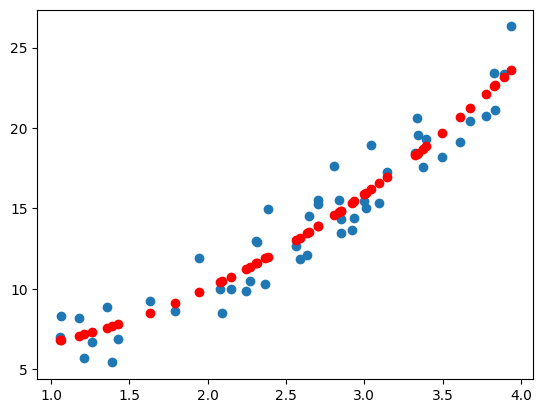

In [15]:
X,y = load_data()

poly_x = Polynomial_transform(X)

linear_model = Multi_Regression(poly_x,y)

predicted = linear_model.predict(poly_x)

plotting_graph(X,y,predicted)
    
print(predicted)